# Exploratory Data Analysis – Dataset 2

This notebook performs a detailed exploratory data analysis (EDA) on Dataset 2.  
The goals are to:
- Understand the distribution and relationships of the features
- Identify important variables related to heart disease
- Detect patterns, anomalies, and trends
- Generate insights to guide the statistical testing and modeling stages

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

from src.overview_functions import convert_to_string_to_lower, display_column_distribution, display_scatterplot_by_features

In [45]:
dataset2 = pd.read_csv('../data/cleaned_data/dataset2_cleaned.csv')
dataset2

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,atypical angina,1
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,typical angina,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,atypical angina,1
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,non-anginal pain,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,non-anginal pain,1
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,typical angina,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,asymptomatic,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,atypical angina,1


In [46]:
dataset2.describe()

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,0.497000,249.939000,135.2810,79.204000,0.988000,1.006000,4.529000,0.499000,0.505000,0.499000,5.646000,134.941000,0.472000,0.392000
std,15.727126,0.500241,57.914673,26.3883,11.486092,0.815181,0.828644,2.934241,0.500249,0.500225,0.500249,2.831024,36.699624,0.499465,0.488441
min,25.000000,0.000000,150.000000,90.0000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,0.000000,0.000000
25%,39.000000,0.000000,200.000000,112.7500,70.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,104.000000,0.000000,0.000000
50%,52.000000,0.000000,248.000000,136.0000,79.000000,1.000000,1.000000,4.500000,0.000000,1.000000,0.000000,6.000000,135.000000,0.000000,0.000000
75%,66.000000,1.000000,299.000000,159.0000,89.000000,2.000000,2.000000,7.000000,1.000000,1.000000,1.000000,8.000000,167.000000,1.000000,1.000000
max,79.000000,1.000000,349.000000,179.0000,99.000000,2.000000,2.000000,9.000000,1.000000,1.000000,1.000000,10.000000,199.000000,1.000000,1.000000


In [47]:
#Check the structure of the dataset1
dataset2.shape

(1000, 16)

In [48]:
dataset2.head(5)

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,atypical angina,1
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,typical angina,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,atypical angina,1
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,non-anginal pain,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,asymptomatic,0


In [49]:
#Check data types
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1000 non-null   int64 
 1   gender                   1000 non-null   int64 
 2   cholesterol              1000 non-null   int64 
 3   pressure_high            1000 non-null   int64 
 4   heart_rate               1000 non-null   int64 
 5   smoking                  1000 non-null   int64 
 6   alcohol_intake           1000 non-null   int64 
 7   exercise_hours           1000 non-null   int64 
 8   family_history           1000 non-null   int64 
 9   diabetes                 1000 non-null   int64 
 10  obesity                  1000 non-null   int64 
 11  stress_level             1000 non-null   int64 
 12  blood_sugar              1000 non-null   int64 
 13  exercise_induced_angina  1000 non-null   int64 
 14  chest_pain_type          1000 non-null   

In [50]:
# Check for empty values
dataset2.isna().sum()

age                        0
gender                     0
cholesterol                0
pressure_high              0
heart_rate                 0
smoking                    0
alcohol_intake             0
exercise_hours             0
family_history             0
diabetes                   0
obesity                    0
stress_level               0
blood_sugar                0
exercise_induced_angina    0
chest_pain_type            0
heart_disease              0
dtype: int64

In [51]:
dataset2['heart_disease'].value_counts(normalize=True) * 100

heart_disease
0    60.8
1    39.2
Name: proportion, dtype: float64

###### Distribution of heart disease into dataset 2
###### 0 - Negative
###### 1 - Positive

In [52]:
dataset2['gender'].value_counts(normalize=True) * 100

gender
0    50.3
1    49.7
Name: proportion, dtype: float64

###### Distribution of genders into dataset 2
###### 0 - female
###### 1 - male

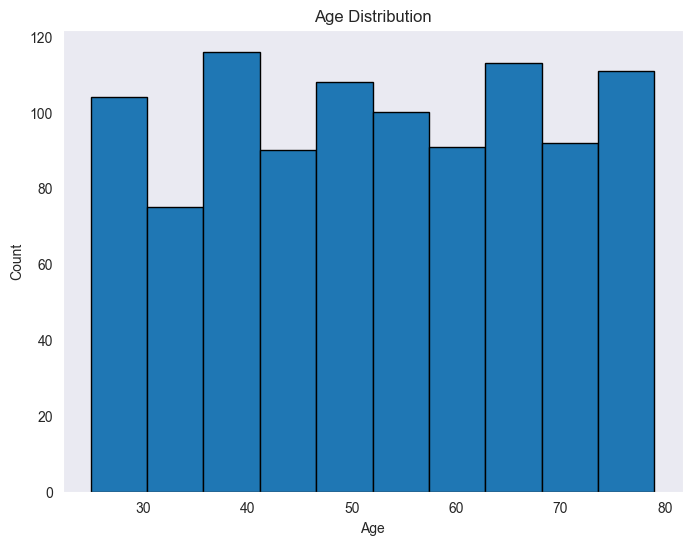

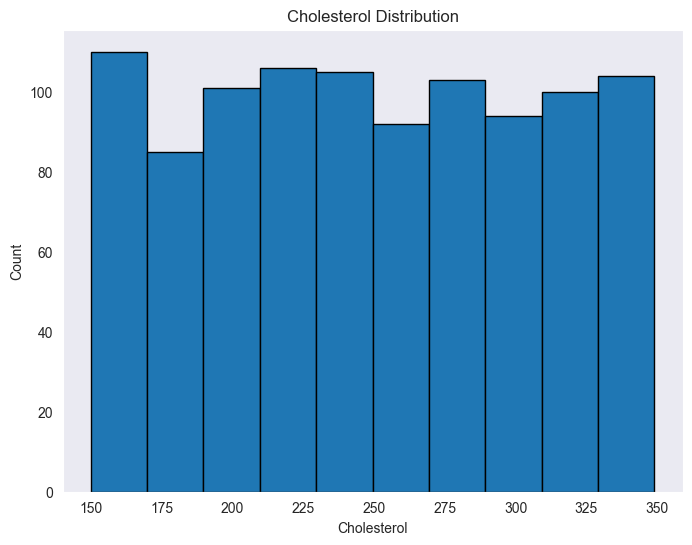

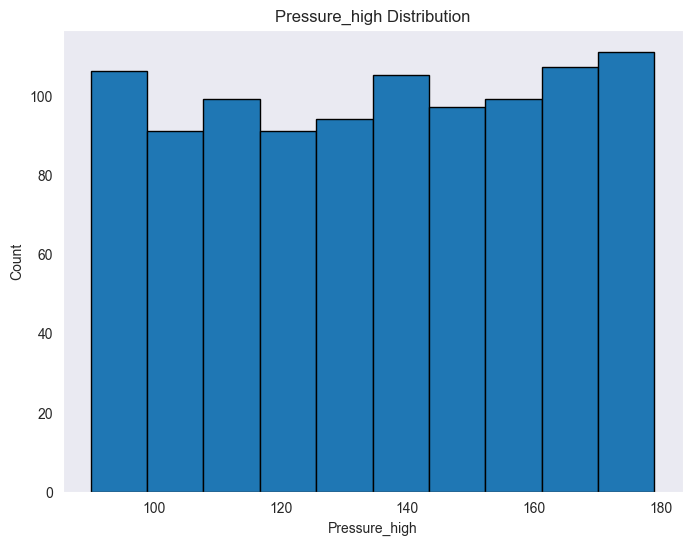

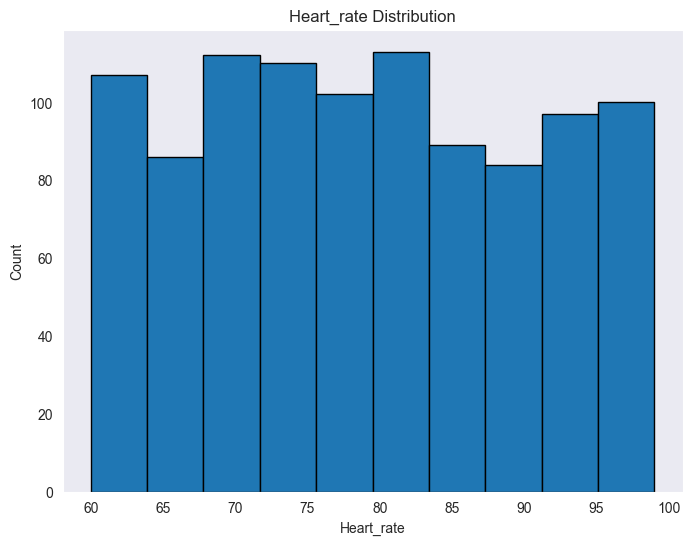

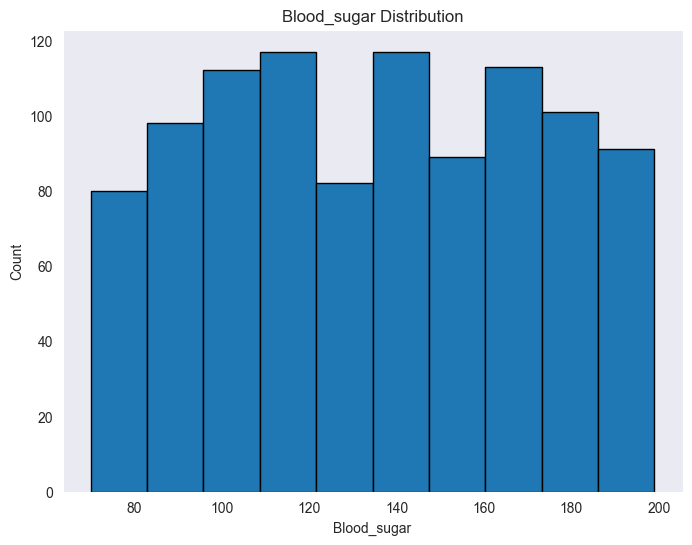

In [53]:
numeric_columns = dataset2[['age', 'cholesterol', 'pressure_high', 'heart_rate', 'blood_sugar']]

for col in numeric_columns:
    display_column_distribution(dataset2, col)

**Insight:**  
At first glance, the features **Age**, **Cholesterol**, **Pressure High**, **Heart Rate**, and **Blood Sugar**  
appear to follow a distribution close to normal. This observation suggests that these variables  
are relatively well-behaved and suitable for statistical analyses that assume normality.


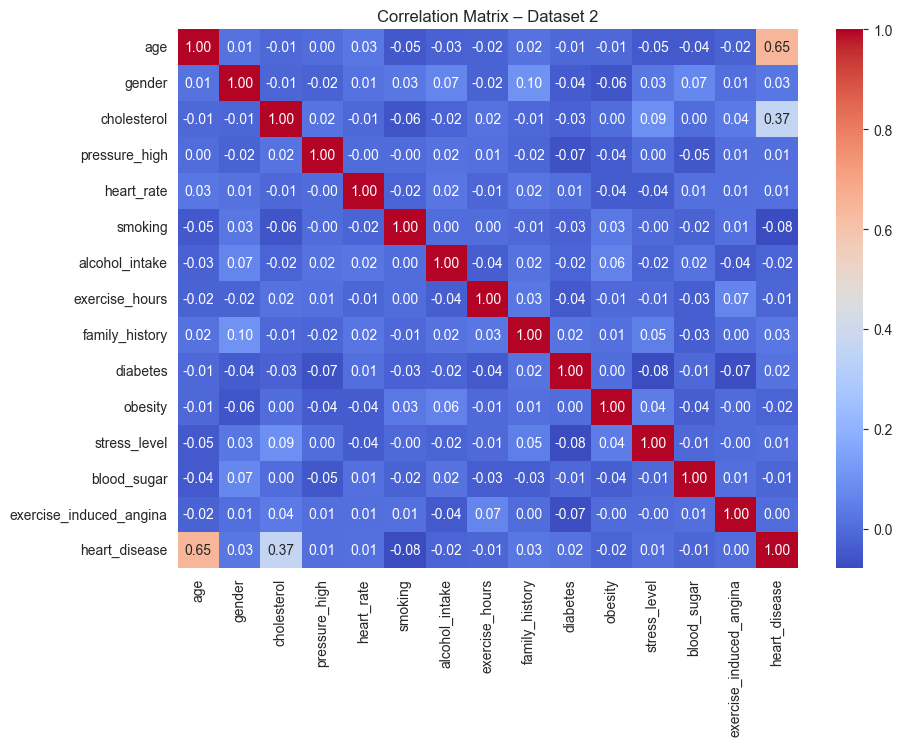

In [54]:
# Generate and display correlation matrix heatmap for Dataset 2
# Visualize correlations between features using a heatmap
corr_matrix_dataset1 = dataset2.drop(columns=['chest_pain_type']).corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_dataset1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix – Dataset 2')
plt.show()

**Insight:**  
The correlation matrix for Dataset 2 shows that most features are largely independent of each other,  
indicating a low risk of multicollinearity in modeling.  

The strongest correlations with **heart disease** are observed for:  
- **Age** (r ≈ 0.65) – older patients are more likely to have heart disease.  
- **Cholesterol** (r ≈ 0.37) – higher cholesterol levels are moderately associated with heart disease.  

Other features show little to no linear correlation with the target.  
However, this does not mean they are irrelevant — their impact may be **non-linear** or only visible  
when combined with other risk factors.  

This information is useful for feature selection, ensuring model stability,  
and guiding further analysis of possible interactions between variables.



### Distribution of Numerical Features by Heart Disease Status

In this subsection, we analyze the distributions of selected numerical features  
(**Age**, **Cholesterol**, **Pressure High**, **Heart Rate**, **Blood Sugar**)  
by splitting the data into two groups: patients with heart disease and patients without heart disease.  
This comparison helps reveal potential differences in the characteristics of the two populations.


In [55]:
no_disease = dataset2[dataset2["heart_disease"] == 0][['age', 'cholesterol']]
disease = dataset2[dataset2["heart_disease"] == 1][['age', 'cholesterol']]

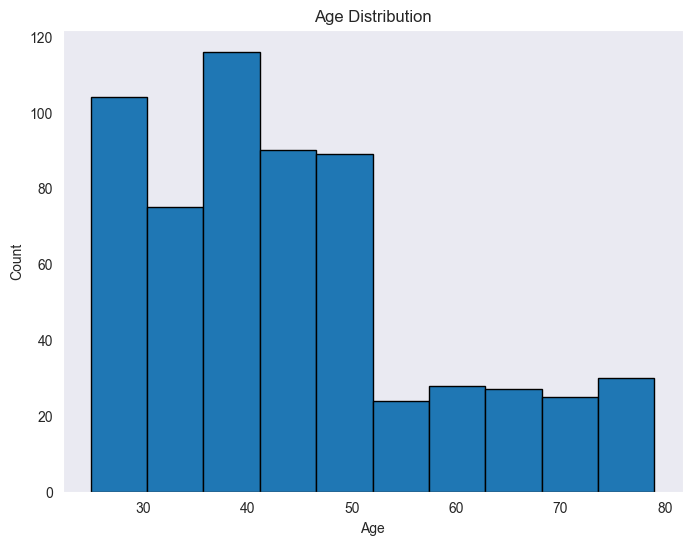

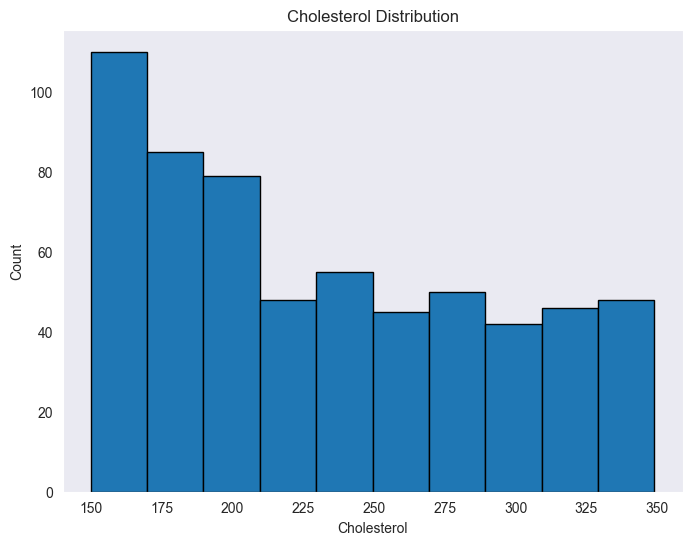

In [56]:
numeric_columns = dataset2[['age', 'cholesterol']]
for col in numeric_columns:
    display_column_distribution(no_disease, col)

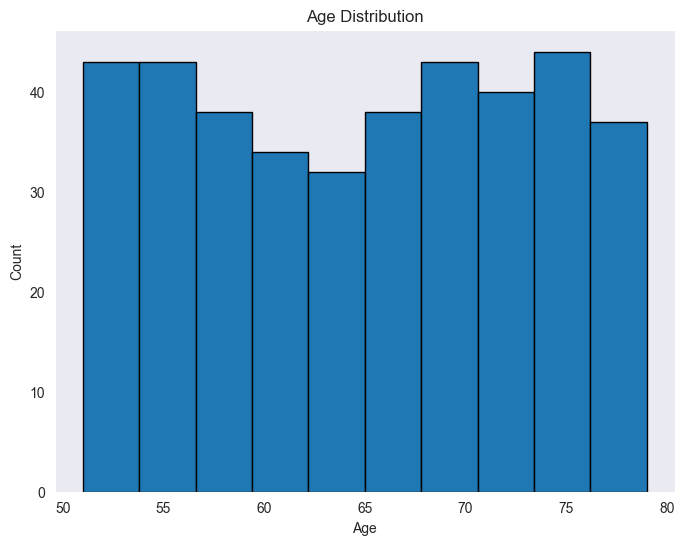

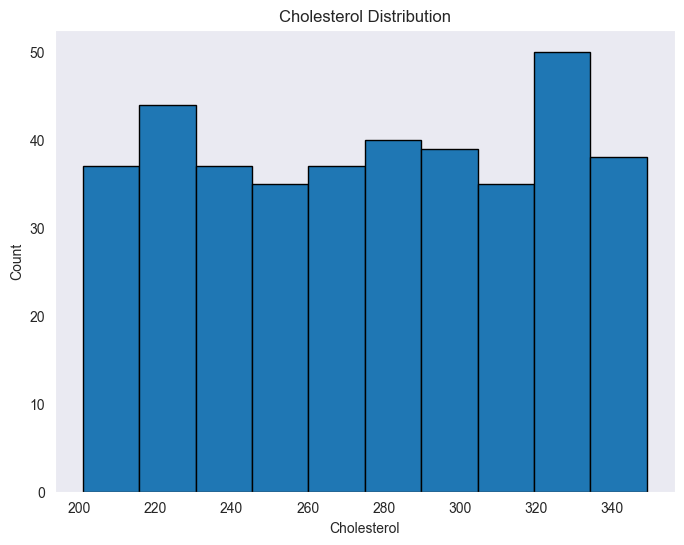

In [57]:
numeric_columns = dataset2[['age', 'cholesterol']]
for col in numeric_columns:
    display_column_distribution(disease, col)

## Boxplot Analysis of Numerical Features by Heart Disease Status


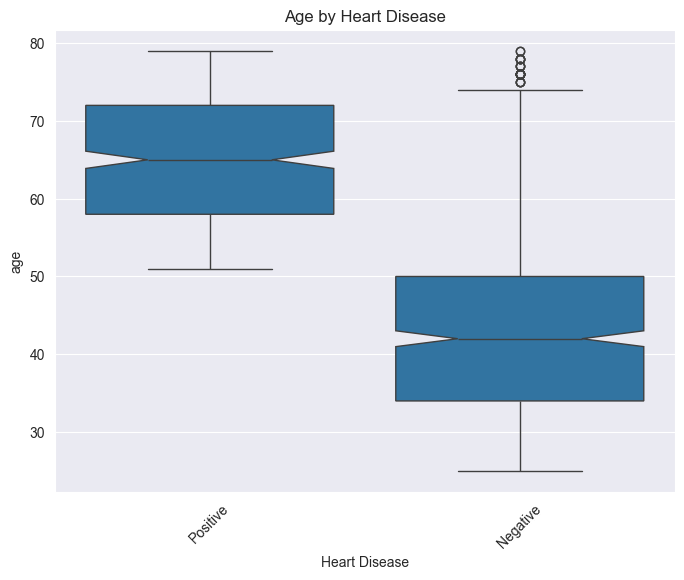

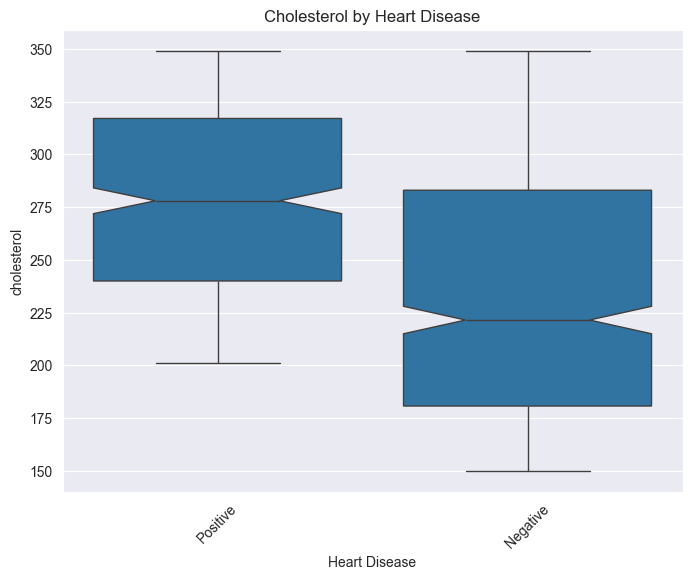

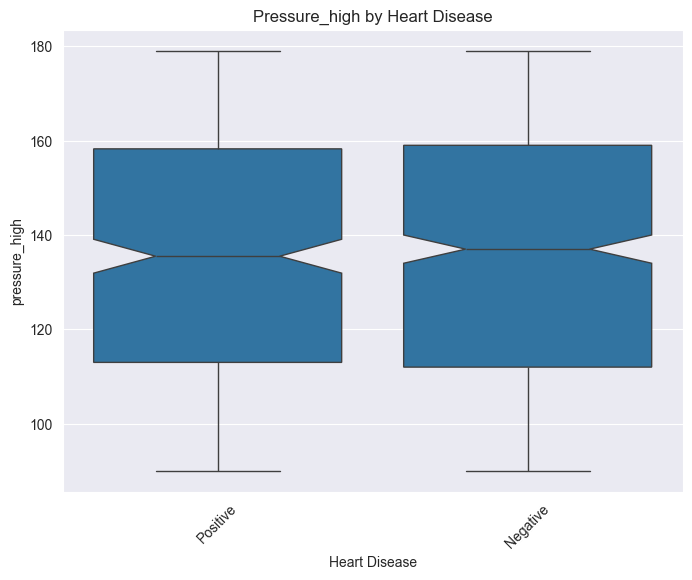

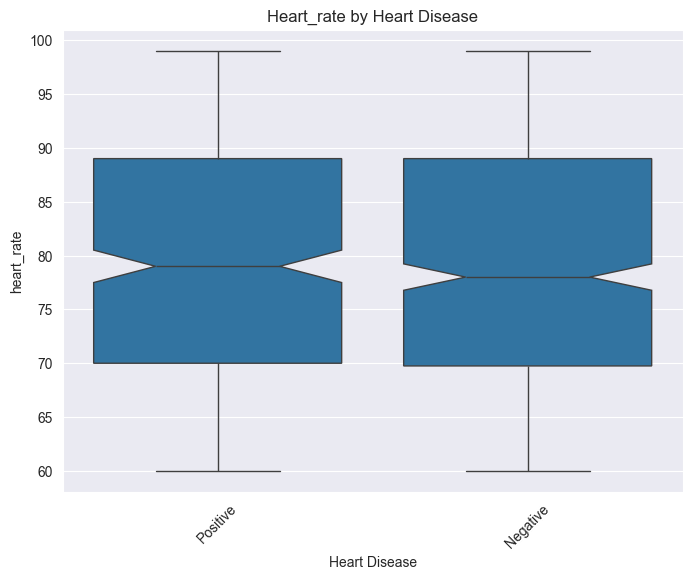

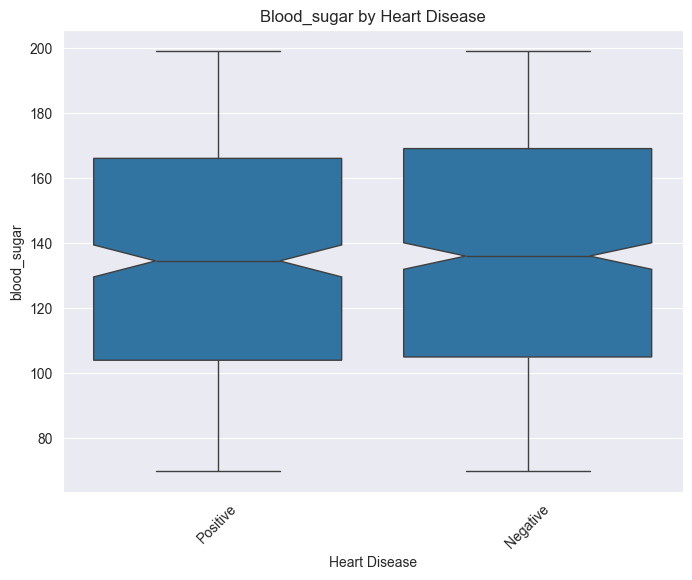

In [60]:
numeric_columns = dataset2[['age', 'cholesterol', 'pressure_high', 'heart_rate', 'blood_sugar']]
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x=dataset2['heart_disease'].map({0: 'Negative', 1: 'Positive'}),
        y=col,
        data=dataset2,
        notch=True,
        showfliers=True
    )
    
    
    plt.title(f'{col.capitalize()} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.xticks(rotation=45)
    plt.show()

### Final Conclusion

When comparing patients with and without heart disease, clear differences are observed in the features  
**Age** and **Cholesterol**, supporting their strong correlation with the target variable.  

In contrast, features such as **Pressure High**, **Heart Rate**, and **Blood Sugar** do not show  
significant differences between the two groups, which aligns with the weak correlations observed  
in the correlation matrix.  

Overall, this suggests that **Age** and **Cholesterol** are key predictors of heart disease,  
while the other variables may play a more limited or indirect role.
